<a href="https://colab.research.google.com/github/tiagopessoalima/covid-19/blob/master/COVID_19_(Previs%C3%B5es).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**PREVISÕES**
Nos gráficos que serão exibidos neste notebook, temos em azul a previsão do modelo. Já as bolinhas pretas são as confirmações. Em **PARÂMETROS**, você pode escolher um local (World para o mundo ou o país em inglês) e a quantidade de dias para realizar simulações.

**PARÂMETROS**

In [0]:
dias = 60
local = 'World'

**IMPORTANDO BIBLIOTECAS**

In [0]:
import numpy as np
import pandas as pd
from fbprophet import Prophet

**FUNÇÕES AUXILIARES**

In [0]:
def prever(df):
  profeta = Prophet(interval_width=0.95)
  profeta.fit(preparar_df(df))
  futuro = profeta.make_future_dataframe(dias)
  profeta.plot(profeta.predict(futuro))

In [0]:
def preparar_df(df):
  df.reset_index(inplace=True)
  df.columns = ['ds','y']
  df = df.iloc[-15:,:]
  return df

In [0]:
def novos_casos(dataset):
  dataset = dataset.copy()
  for linha in range(len(dataset.values)):
    for coluna in range(dataset.values[linha].size - 1, 4, -1):                
        dataset._set_value(linha, coluna, dataset.values[linha][coluna] 
                           - dataset.values[linha][coluna-1], True)
  return dataset

In [0]:
def somar_datas(dataset):
  dataset = dataset.copy()
  dataset = np.sum(dataset.iloc[:,4:])
  dataset.index = pd.DatetimeIndex(dataset.index)
  return dataset

**CARREGANDO DADOS**

In [0]:
confirmados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
recuperados = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')
mortes = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

**FILTRAR LOCAL**

In [0]:
if local is not 'World':
  confirmados = confirmados[confirmados['Country/Region'] == local]
  recuperados = recuperados[recuperados['Country/Region'] == local]
  mortes = mortes[mortes['Country/Region'] == local]

**CASOS CONFIRMADOS**

- Acumulado

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


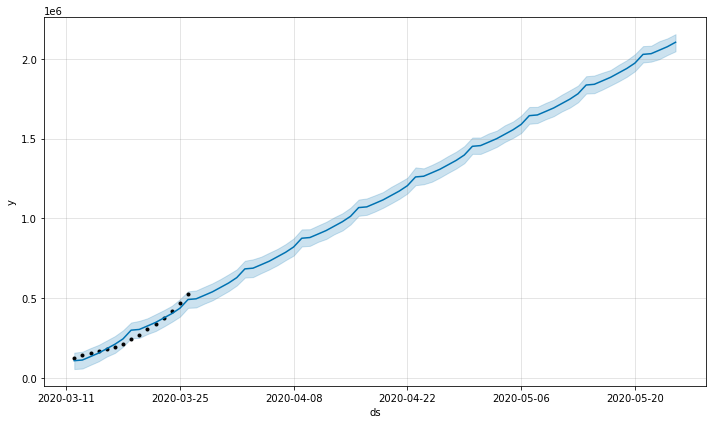

In [9]:
prever(pd.DataFrame(somar_datas(confirmados)))

- Novos Casos

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


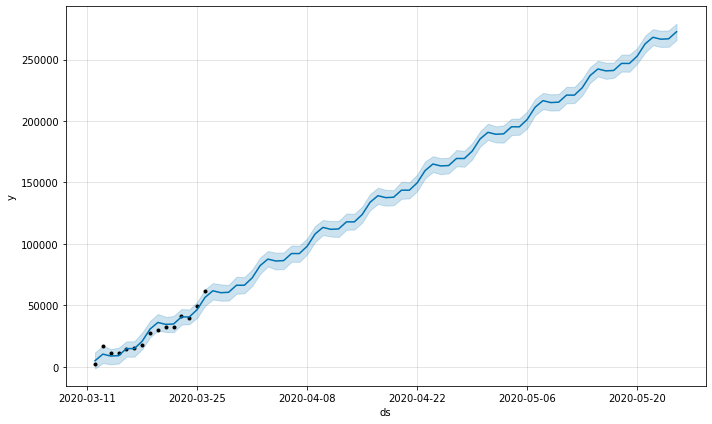

In [10]:
prever(pd.DataFrame(somar_datas(novos_casos(confirmados))))

**CASOS RECUPERADOS**

- Acumulado

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


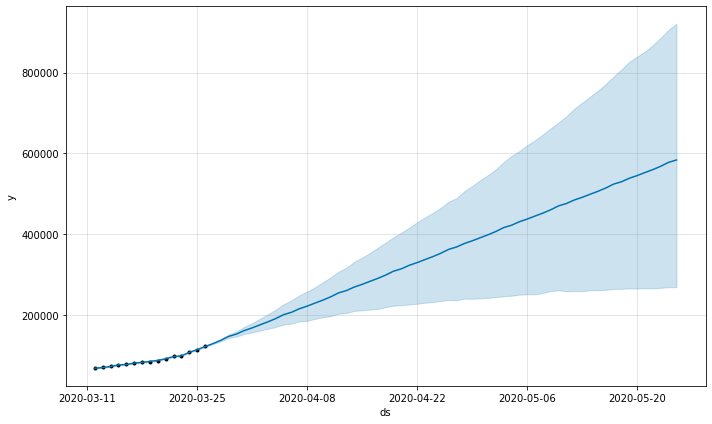

In [11]:
prever(pd.DataFrame(somar_datas(recuperados)))

- Novos Casos

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


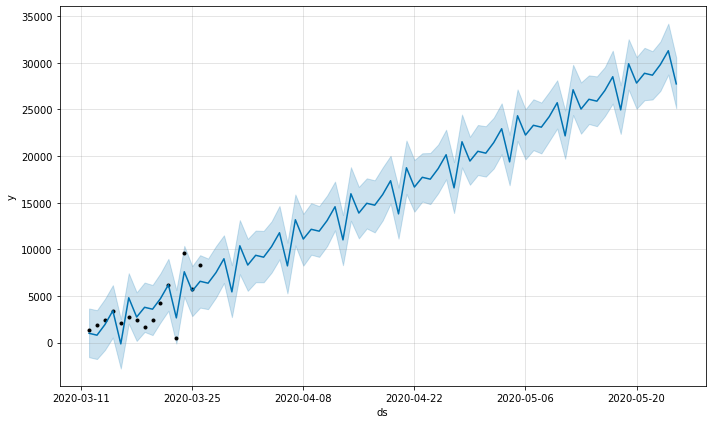

In [12]:
prever(pd.DataFrame(somar_datas(novos_casos(recuperados))))

**MORTES CONFIRMADAS**

- Acumulado

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


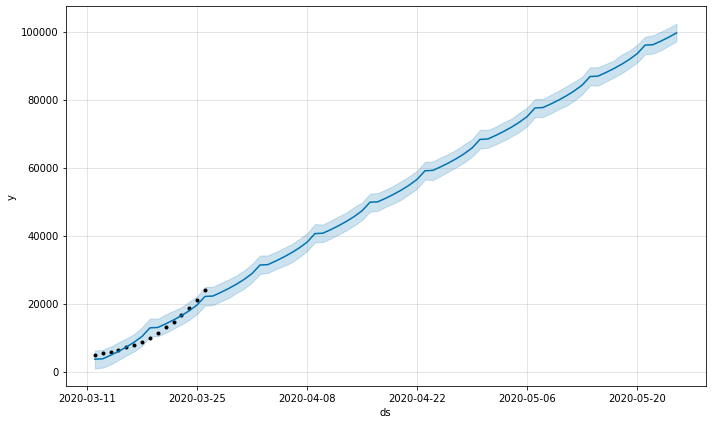

In [13]:
prever(pd.DataFrame(somar_datas(mortes)))

- Novos Casos

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


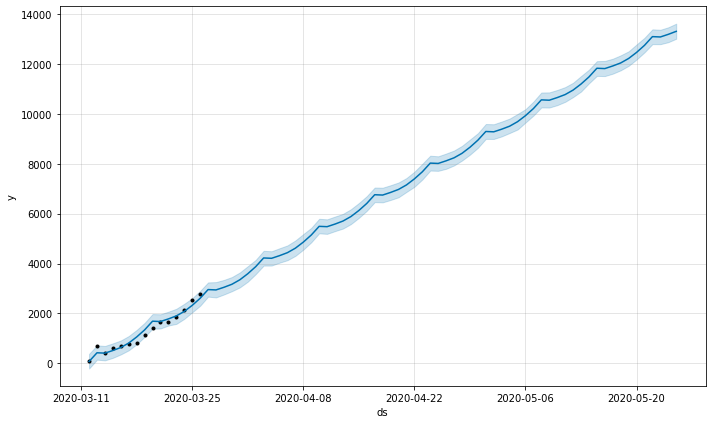

In [14]:
prever(pd.DataFrame(somar_datas(novos_casos(mortes))))

**TRANSMISSORES**

In [0]:
transmissores = confirmados.iloc[:,4:] - recuperados.iloc[:,4:] - mortes.iloc[:,4:]

- Acumulado

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


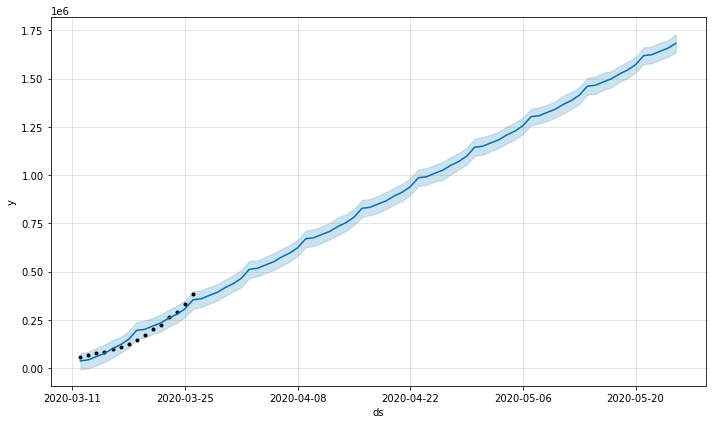

In [16]:
prever(pd.DataFrame(somar_datas(transmissores)))

- Novos Casos

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:n_changepoints greater than number of observations. Using 11.


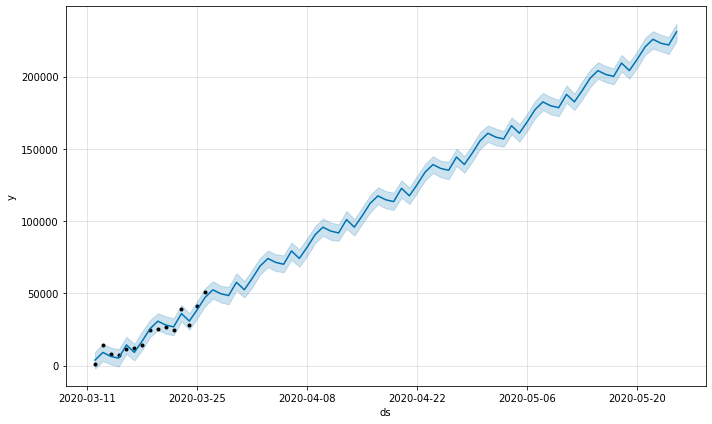

In [17]:
prever(pd.DataFrame(somar_datas(novos_casos(transmissores))))